In [98]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
#import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
#import quandl
style.use('ggplot')

In [77]:
df = pd.read_csv("gold_prices.csv")


In [78]:
df["mov_avg"] = df["Close"].rolling(window=50).mean()
df["mov_avg"].fillna(0,inplace = True)
df.head(100)

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,mov_avg
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03,0.0000
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00,0.0000
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00,0.0000
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00,0.0000
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-07-22,0.54,0.54,0.54,0.54,0.54,318.0,1.0,171.0,318.0,100.0,0.00,0.00,0.7002
96,2016-07-21,0.56,0.56,0.56,0.56,0.56,11700.0,2.0,6552.0,11700.0,100.0,0.00,0.00,0.6938
97,2016-07-19,0.57,0.57,0.57,0.57,0.57,2200.0,4.0,1254.0,2200.0,100.0,0.00,0.00,0.6884
98,2016-07-18,0.60,0.60,0.60,0.60,0.60,110.0,1.0,66.0,110.0,100.0,0.00,0.00,0.6844


In [79]:
length=10
df["prediction"] = df["Close"].shift(length)

df.head(100)

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,mov_avg,prediction
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03,0.0000,NaN
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00,0.0000,NaN
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00,0.0000,NaN
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00,0.0000,NaN
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-07-22,0.54,0.54,0.54,0.54,0.54,318.0,1.0,171.0,318.0,100.0,0.00,0.00,0.7002,0.73
96,2016-07-21,0.56,0.56,0.56,0.56,0.56,11700.0,2.0,6552.0,11700.0,100.0,0.00,0.00,0.6938,0.71
97,2016-07-19,0.57,0.57,0.57,0.57,0.57,2200.0,4.0,1254.0,2200.0,100.0,0.00,0.00,0.6884,0.69
98,2016-07-18,0.60,0.60,0.60,0.60,0.60,110.0,1.0,66.0,110.0,100.0,0.00,0.00,0.6844,0.66


In [80]:
y = np.array(df["prediction"])
# In prediction column it leaves the first 10 values and then fetches from the 11th
y = y[length:]
y
len(y)

1650

In [81]:
x = np.array(df["Close"])
x = x[:-length]
x
len(x)


1650

In [88]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
X_train = np.reshape(X_train,(X_train.shape[0],1))
X_test = np.reshape(X_test,(X_test.shape[0],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))
y_test = np.reshape(y_test,(y_test.shape[0],1))


In [89]:
X_train.shape


(1320, 1)

In [90]:
X_test.shape


(330, 1)

In [91]:
y_train.shape


(1320, 1)

In [92]:
y_test.shape

(330, 1)

In [93]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_confidence = lr.score(X_test,y_test)
lr_confidence

1.0

In [94]:
x_forecast = np.array(df["Close"])[-10:]
x_forecast = np.reshape(x_forecast,(x_forecast.shape[0],1))
x_forecast.shape

(10, 1)

In [95]:
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([[54.45],
       [54.95],
       [53.8 ],
       [55.9 ],
       [57.65],
       [65.25],
       [71.95],
       [70.8 ],
       [60.  ],
       [50.  ]])

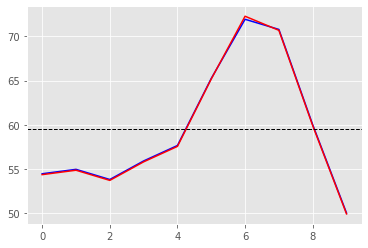

In [105]:
plt.plot(lr_prediction,label= "Linear Regression",color= "b")
plt.plot(svm_prediction, label= "Support Vector Machine",color= "r")
plt.axhline(lr_prediction.mean(), color='k', linestyle='dashed', linewidth=1)

In [101]:
svr_rbf = SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf.fit(X_train,y_train)
svm_confidence = svr_rbf.score(X_test,y_test)
svm_confidence
svm_prediction = svr_rbf.predict(x_forecast)
svm_prediction
a=svm_prediction.mean()

/Users/enakshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


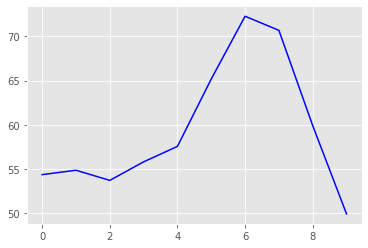

In [103]:
plt.plot(svm_prediction, label= "Support Vector Machine",color= "b")